# В даннном проекте проведем пример EDA по пассажирам на тинатинке

In [102]:
# Context

In [103]:
# Импортирует библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [104]:
# загружаем наш дата сет
df = pd.read_csv('train.csv')

In [105]:
#Напишем пару полезных функций для анализа.
# -----------------------------------------------------------------------
def look_at_col(df, col_name):
    '''Данная функция принимает в качестве аргументов датасет и название
    колонки в str формате, и возвращает уникальные значение, моду,
    так же гистограмму и discribe по отношению к указанному столбцу
    '''

    print(f"Анализируем столбец {col_name} ")
    print(f"Уникальные значения : {df[col_name].unique()}")
    print("---------------------------------------------------------")
    print(f"Кол-во нулевых значений {df[col_name].isnull().sum()} ")
    print("Мода -", df[col_name].mode())
    print(df[col_name].describe())
    print('Численное распределение')
    print(df[col_name].value_counts())
    plt.figure(figsize=(16,8))
    ax = sns.countplot(x=col_name, data=df)
    plt.title(f'Гистограмма к столбцу {col_name}')
    plt.ylabel("Количество")
    ax.tick_params(axis='x', labelrotation=90)

# Data quality assessment

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Краткое описание данных
В данных всего 11 призаков.    
PassengerId  - ID пассажира. Данные заполнены на 100%   
Survived - Отметка выжил человек, или нет. Данные заполнены на 100% 
Pclass – Класс билета. Данные заполнены на 100%    
Name - Имя пассажира. В формате (Фамилия, Имя) Данные заполнены на 100%    
Sex - пол пассажира. Данные заполнены на 100%.    
Age - возраст пассажира. 3292 пропусков что 0,03292 % от всей выборки.    
Sibs- Количество братьев и сестер / супругов на борту Титаника. Данные заполнены на 100%.    
Parch- родителей/детей на борту Титаника. Данные заполнены на 100%.             
Ticket - номер билета. 4623 пропусков, что 0,04623% от всей выборки. Данную переменную мы анализировать не будем, т.к. слишком много пропусков.   
Fare - стоимость билета -134 пропусков, что -0,00134% от всей выборки.    
Cabin - номер кабины. Пропуски 67866 в данных 0,67866 % пропусков. Стобец вообще не информативен.    
Embarked - порт погрузки. 250 пропусков. что  0,0025 %    

# Посмотрим на данные по ближе. 

Для начала посмотрим распределение каждой переменной, а после рассмотрим взаимосвязь между переменными.

## PassengerId. 

In [107]:
# проверим данные на дубликаты
len(df.PassengerId.unique())

100000

Уникальные данные. Каждый пассажир имеет свой уникальный номер. Дубликатов нету.

# Survived

In [108]:
len(df.Survived.unique())

2

Бинарная переменная. Имеет всего два значения 1 и 0. 

## Pclass

PClass - категориальные данные. Которые имеют всего три значения, соответствующие классу пассажира.

Анализируем столбец Pclass 
Уникальные значения : [1 3 2]
---------------------------------------------------------
Кол-во нулевых значений 0 
Мода - 0    3
dtype: int64
count    100000.000000
mean          2.106910
std           0.837727
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Pclass, dtype: float64
Численное распределение
3    41006
1    30315
2    28679
Name: Pclass, dtype: int64


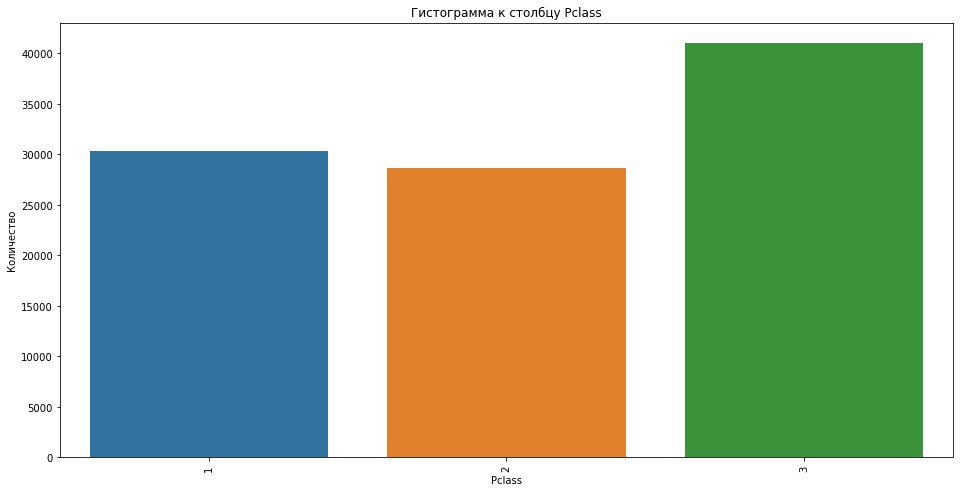

In [109]:
look_at_col(df,'Pclass')

Как мы видим на графике, пассажиров третьего класса больше всего. Почти на 10 000 больше чем у остальных.

## Name. 

In [110]:
#узнаем количество уникальный значений.
len(df.Name.unique())

92144

А вот тут интересно. Признак заполнен на 100% а у нас всего 92144 уникальных значений. Значит у нас есть 7856 людей с одинаковыми именами и фамилиями.    
Посмотрим на топ пять самых популярных фамилий и имен. 

In [111]:
df['Name'].value_counts().head(5)

Johnson, John       31
Smith, James        24
Smith, John         24
Johnson, William    22
Smith, Michael      20
Name: Name, dtype: int64

Теперь посмотрим отдельно на фамилию и имя отдельно друг от друга.

In [112]:
df['First_name'] = df['Name'].apply(lambda x: x.split(', ')[1])

In [113]:
df['surname'] = df['Name'].apply(lambda x: x.split(', ')[0])

In [114]:
df['surname'].value_counts().head(10)

Smith       1162
Johnson      950
Williams     733
Jones        681
Brown        665
Davis        519
Miller       427
Thomas       374
Wilson       371
Moore        363
Name: surname, dtype: int64

In [115]:
df['First_name'].value_counts().head(10)

James      2112
John       2087
Robert     1951
Michael    1685
William    1525
David      1501
Mary       1274
Richard    1119
Charles     931
Thomas      869
Name: First_name, dtype: int64

Как мы видим выше. На Титанике было 1162 разных Smith. Видимо это была очень популярная фамилия в то время.
А самым популярным именем был James.

## Sex

Анализируем столбец Sex 
Уникальные значения : ['male' 'female']
---------------------------------------------------------
Кол-во нулевых значений 0 
Мода - 0    male
dtype: object
count     100000
unique         2
top         male
freq       56114
Name: Sex, dtype: object
Численное распределение
male      56114
female    43886
Name: Sex, dtype: int64


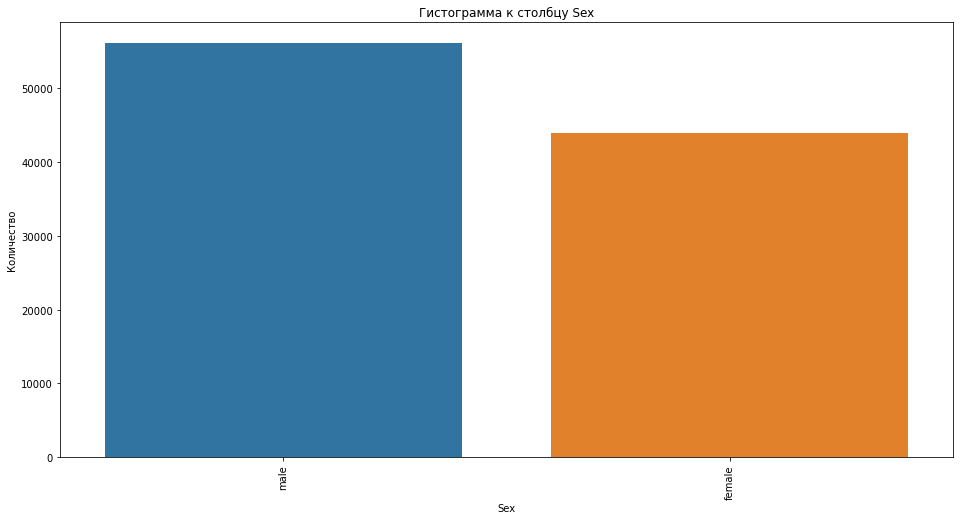

In [116]:
look_at_col(df,'Sex')

Как видим, на борту у нас больше всего мужчин.

## Age          

В связи с тем, что признак храниться в формате float64 и содержит дробные части, то приведем весь столбец к типу int, чтобы облегчить анализ.

In [117]:
df['Age'] = df['Age'].apply(lambda x: np.nan if np.isnan(x) else int(x) )

Анализируем столбец Age 
Уникальные значения : [nan  0. 19. 25. 35.  7.  6. 27. 66. 31. 60. 36. 50. 44. 57. 53. 43. 61.
 17. 39. 59. 23. 21. 26.  5. 67. 54. 69. 22. 68. 71. 63. 47. 45. 34.  3.
 28. 37. 64. 58. 56. 40. 38. 20.  8. 70. 11. 49. 52. 48. 41. 32. 62. 55.
 65. 46.  2. 42. 29. 51. 14. 24. 30. 33. 18. 79. 12.  9.  1. 15. 10. 72.
 77. 73.  4. 16. 80. 13. 74. 75. 76. 81. 78. 84. 83. 85. 82. 87. 86.]
---------------------------------------------------------
Кол-во нулевых значений 3292 
Мода - 0    25.0
dtype: float64
count    96708.000000
mean        38.349557
std         18.320425
min          0.000000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64
Численное распределение
25.0    2368
23.0    2355
26.0    2332
24.0    2313
27.0    2100
        ... 
82.0       9
85.0       4
84.0       3
86.0       2
87.0       1
Name: Age, Length: 88, dtype: int64


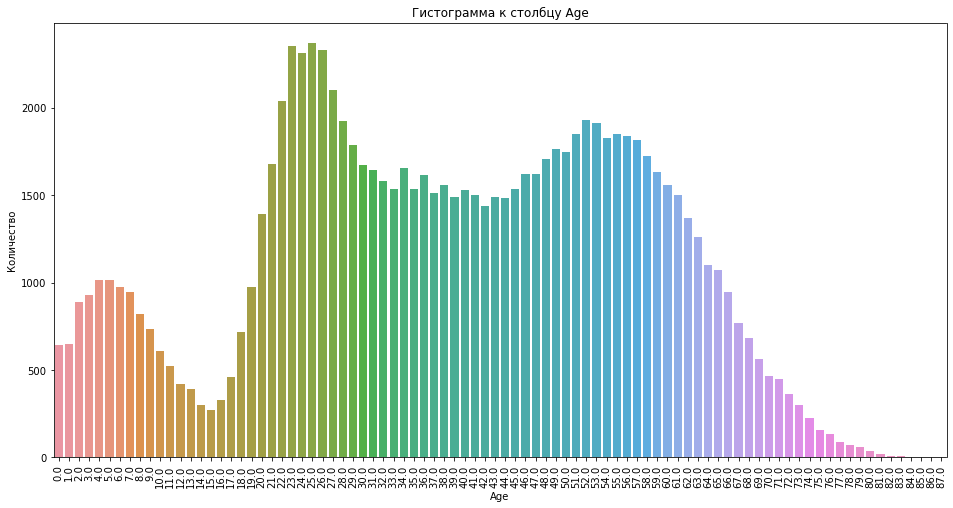

In [118]:
look_at_col(df,'Age')

In [119]:
# посомтрим ещё на медиану.
df['Age'].median()

39.0

Выборка распределена неравномерно.    
Больше всего у нас людей в возрасте от 20 до 30.    
Медиана - 39 лет.    
средний возраст 38 лет.    
а мода 25 лет.    
Наиболее ярко у нас выделены 4 группы.    
1 - дети до 10 лет.    
2 - люди в возрасте от 20 до 30.    
3 - в возрасте от 30 до 40.    
4 - в возрасте от 40 до 58.    

# SibSp

Анализируем столбец SibSp 
Уникальные значения : [2 0 1 3 4 8 5]
---------------------------------------------------------
Кол-во нулевых значений 0 
Мода - 0    0
dtype: int64
count    100000.000000
mean          0.397690
std           0.862566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: SibSp, dtype: float64
Численное распределение
0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64


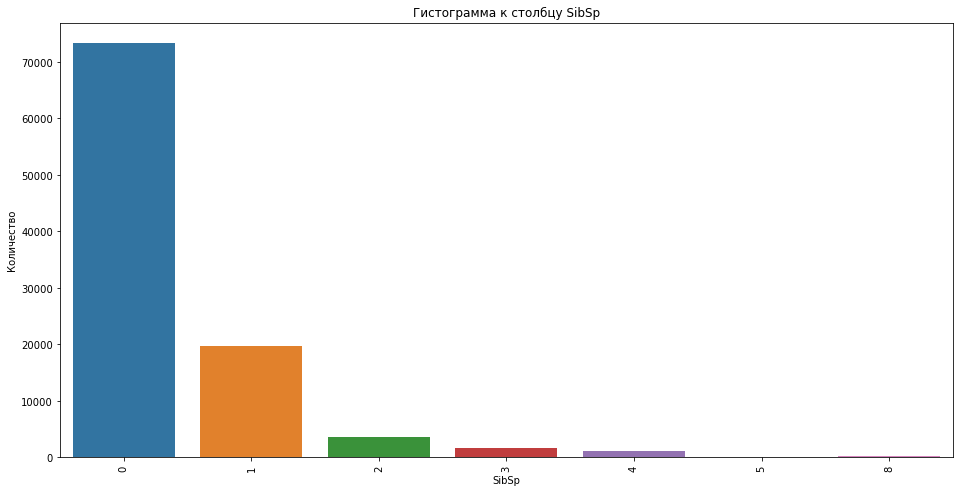

In [120]:
look_at_col(df, 'SibSp')

In [121]:
df[df['SibSp'] == 8].head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name,surname
204,204,1,3,"Bennett, Shirley",female,12.0,8,1,21620,12.51,NaN,C,Shirley,Bennett
692,692,0,2,"Gomes, James",male,35.0,8,2,A/5,24.55,NaN,S,James,Gomes
708,708,0,1,"Ulloa, Mathew",male,53.0,8,1,13352,195.94,A7232,S,Mathew,Ulloa
1000,1000,1,3,"Harper, Barbara",female,33.0,8,1,28882,64.99,NaN,S,Barbara,Harper
1230,1230,0,3,"Carlson, Douglas",male,29.0,8,1,338099,9.26,NaN,S,Douglas,Carlson
1367,1367,0,2,"Fairhurst, Eric",male,7.0,8,2,418122,87.46,B7602,S,Eric,Fairhurst
2082,2082,0,1,"Penney, Mary",female,1.0,8,1,10707,29.14,NaN,S,Mary,Penney
2896,2896,0,3,"Shary, Russell",male,52.0,8,1,A/4 21984,22.77,A2101,S,Russell,Shary
2955,2955,0,2,"Godina, Donte",male,28.0,8,1,438614,32.13,NaN,C,Donte,Godina
3685,3685,1,1,"Mcfarland, Wanda",female,29.0,8,0,21804,28.23,C14426,S,Wanda,Mcfarland


Как мы видим, большинство людей на Титанике было без родственников и детей. а у некоторых число доходило аж до 8 человек.
Весьма интересно что в выборке отсутствуют люди у которых было 6 или 7 родственников на корабле.

# Parch

Анализируем столбец Parch 
Уникальные значения : [0 2 1 4 3 5 6 9]
---------------------------------------------------------
Кол-во нулевых значений 0 
Мода - 0    0
dtype: int64
count    100000.000000
mean          0.454560
std           0.950076
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: Parch, dtype: float64
Численное распределение
0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64


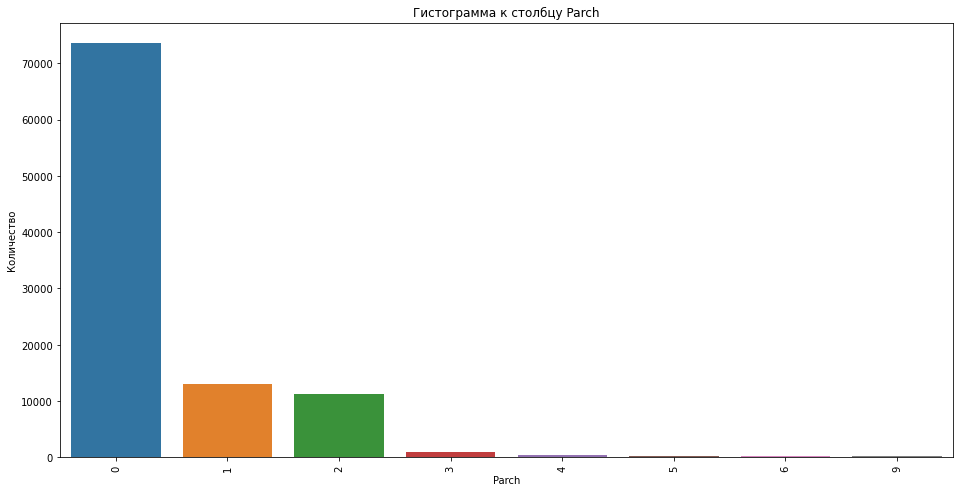

In [122]:
look_at_col(df, 'Parch')

In [123]:
df[df['Parch'] == 2].head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name,surname
2,2,0,3,"Owens, Kenneth",male,0.0,1,2,CA 457703,71.29,NaN,S,Kenneth,Owens
7,7,1,3,"Werner, Linda",female,6.0,1,2,434426,31.50,NaN,S,Linda,Werner
27,27,1,1,"Way, Tina",female,35.0,0,2,476162,154.61,C20297,C,Tina,Way
55,55,0,3,"Persad, Elbert",male,3.0,1,2,424265,80.84,NaN,S,Elbert,Persad
63,63,0,1,"Moreno, Carla",female,36.0,0,2,SC/Paris 231091,473.49,A6932,C,Carla,Moreno
67,67,0,1,"Stefani, Alfred",male,38.0,1,2,CA. 6654,27.70,B4480,S,Alfred,Stefani
91,91,0,1,"Lavadera, Richard",male,50.0,1,2,12272,8.82,B5371,S,Richard,Lavadera
104,104,0,1,"Butt, David",male,48.0,1,2,15745,124.81,C7341,S,David,Butt
126,126,1,3,"Whitney, Richard",male,6.0,1,2,C.A. 11175,32.07,NaN,S,Richard,Whitney
135,135,0,1,"Rebman, Bessie",female,54.0,1,2,346652,84.93,B9829,Q,Bessie,Rebman


Как мы видим, большинство людей на Титанике было без родителей/детей на борту Титаника. Максимальное значение признака равно 9.

# Ticket

In [124]:
len(df.Ticket.unique())

75332

Весьма интеренстно. Что, что из 95377 данных всего 75332 уникальных номеров билетов. Проанализируем данный признак.

In [125]:
#df['Ticket'].value_counts().head()

In [126]:
df[df['Pclass'] == 1]['Ticket'].value_counts().head(50)

PC          6
25926       5
26835       5
25386       5
20851       5
27322       5
26912       5
13527       5
28232       5
27415       4
24399       4
11874       4
26386       4
27362       4
28418       4
PC 26296    4
27661       4
27945       4
11912       4
26446       4
25336       4
26831       4
10158       4
11733       4
28148       4
26643       4
12543       4
11596       4
11458       4
26261       4
26298       4
26139       4
25303       4
26783       4
27385       4
24956       4
12354       4
27184       4
26030       4
25412       4
24247       4
11884       4
13383       4
22957       4
28140       4
28784       4
27297       4
25842       4
25453       4
24511       4
Name: Ticket, dtype: int64

In [127]:
df[df['Pclass'] == 2]['Ticket'].value_counts().head(60)

A/5            67
C.A.           26
SC/PARIS       23
SC             12
SOTON/O.Q.      8
9566            7
W./C.           6
10653           5
11217           5
10377           5
10702           5
11947           5
10676           5
10440           5
9491            5
A/4             5
8923            5
10867           5
9303            5
7318            5
12689           4
10957           4
11134           4
13532           4
11619           4
11006           4
10664           4
9734            4
9888            4
7961            4
11314           4
11592           4
8218            4
8837            4
10967           4
8321            4
10103           4
13716           4
11335           4
9121            4
10210           4
10452           4
11174           4
8930            4
11811           4
9627            4
8887            4
9766            4
12282           4
8257            4
9794            4
9813            4
9974            4
12472           4
11219           4
11237     

In [128]:
df[df['Pclass'] == 3]['Ticket'].value_counts().head(50)

A/5            535
C.A.           151
SC/PARIS       122
SOTON/O.Q.      72
W./C.           47
SC              45
A/5.            36
W.E.P.          19
CA              18
STON/O2.        18
PP              15
CA.             12
S.P.            10
LP              10
SOTON/OQ         9
A/4              7
S.C./PARIS       6
10603            6
AQ/3.            6
S.O.C.           6
S.C./A.4.        6
12255            6
10304            6
10697            6
9502             5
12032            5
11995            5
12736            5
11847            5
12428            5
13280            5
10301            5
11317            5
10029            5
11924            5
11193            5
11538            5
13298            5
11491            5
11044            5
P/PP             5
12535            5
27465            5
11225            5
10362            5
11992            5
12105            4
11509            4
13657            4
12921            4
Name: Ticket, dtype: int64

In [129]:
df[df['Ticket'] == 'A/5 ']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name,surname
6,6,0,3,"Conway, Jose",male,7.0,0,0,A/5,9.77,NaN,S,Jose,Conway
319,319,0,3,"Henderson, Luella",female,21.0,0,0,A/5,10.85,NaN,S,Luella,Henderson
448,448,0,3,"Schaefer, Tammy",female,60.0,0,0,A/5,8.91,NaN,S,Tammy,Schaefer
692,692,0,2,"Gomes, James",male,35.0,8,2,A/5,24.55,NaN,S,James,Gomes
1069,1069,1,2,"Nolan, Tisha",female,49.0,0,0,A/5,9.30,NaN,S,Tisha,Nolan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99290,99290,0,3,"Shasteen, Bess",female,24.0,0,0,A/5,9.13,NaN,S,Bess,Shasteen
99476,99476,1,3,"Young, Pamela",female,22.0,0,0,A/5,10.84,NaN,S,Pamela,Young
99621,99621,1,3,"Gariepy, Dessie",female,19.0,0,0,A/5,7.25,NaN,S,Dessie,Gariepy
99777,99777,1,3,"George, Ana",female,68.0,0,0,A/5,8.18,NaN,C,Ana,George


In [130]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name,surname
16714,16714,1,1,"Garcia, Andrea",female,56.0,0,0,PC 28939,121.16,C16511,C,Andrea,Garcia
2082,2082,0,1,"Penney, Mary",female,1.0,8,1,10707,29.14,NaN,S,Mary,Penney
63164,63164,1,2,"Feazel, Samuel",male,20.0,1,0,18224,26.83,NaN,S,Samuel,Feazel
10481,10481,0,1,"Turley, Jonathan",male,31.0,0,0,21540,51.38,A18417,S,Jonathan,Turley
48691,48691,0,3,"Swift, Nathan",male,50.0,0,2,STON/O 417171,67.17,NaN,S,Nathan,Swift
24801,24801,1,1,"Gay, William",male,26.0,1,0,4254008,10.40,NaN,S,William,Gay
26737,26737,0,3,"Buza, Matt",male,44.0,0,0,PP 201027,8.48,NaN,C,Matt,Buza
61019,61019,0,2,"Dennison, Ryan",male,49.0,0,0,179902,98.51,A6945,S,Ryan,Dennison
5082,5082,1,2,"Rendall, Brenda",female,48.0,0,1,10363,27.59,NaN,S,Brenda,Rendall
18762,18762,0,2,"Pierce, Roderick",male,12.0,0,1,3822235,32.17,NaN,S,Roderick,Pierce


В результате анализа, было проверено несколько теорий:     
    1) Связь номера билетов и родствеников.    
    2) Связь номеров билетов и стоимости.    
    3) Связь номеров билетов и классов пассажира    
    4) Связь номеров билетов и возраста.    
По итогу. Обнаружена небольшая связть между классами. Номера билетов из первого класса не повторяються с пассажирами второго и третьего класса.

# Fare

Стоимость билета у нас непрерывная переменная. Построим графики и выведем описательную статистику.

<AxesSubplot:ylabel='Frequency'>

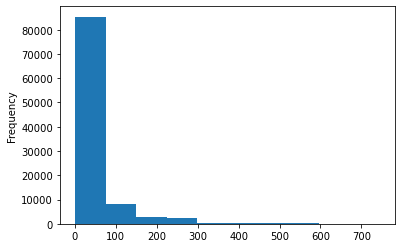

In [131]:
df.Fare.plot.hist()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

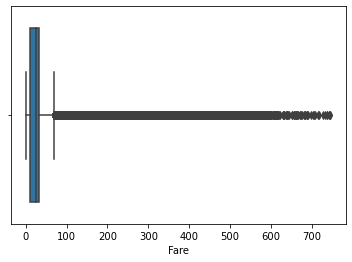

In [132]:
sns.boxplot(df.Fare)

In [133]:
df.Fare.describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

In [134]:
print('Мода')
df.Fare.mode()

Мода


0    9.27
1    9.85
dtype: float64

Как мы видим, большинство билетов и не стоят больше 75 баксов. Что соответствует стоимости билетов пассажиров третьего и второго класса, которых было большинство на Титанике.

# Cabin

In [135]:
# Посмотрим на количество уникальных переменных
len(df.Cabin.unique())

26993

В целом из 32134 представленных квартир, всего 26993 являются уникальными значениями. В целом как известно из истории, пассажиры третьего класса жили по несколько человек в одной кабине.

# Embarked

Анализируем столбец Embarked 
Уникальные значения : ['S' 'C' 'Q' nan]
---------------------------------------------------------
Кол-во нулевых значений 250 
Мода - 0    S
dtype: object
count     99750
unique        3
top           S
freq      72139
Name: Embarked, dtype: object
Численное распределение
S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64


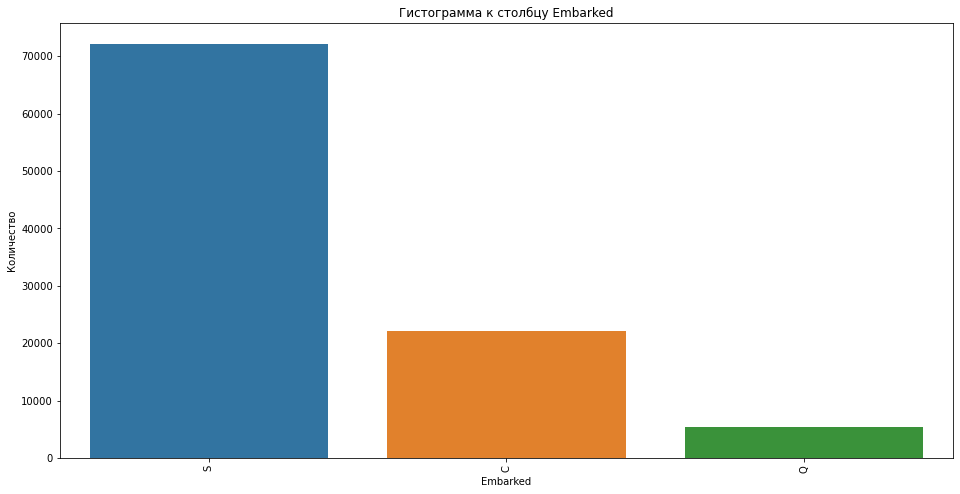

In [136]:
look_at_col(df, 'Embarked')

Большинство пассажиров сели в порту S.

# Data exploration

# Давайте посмотрим на распределение переменных в рамках других признаков. 

### Изучение распределение возраста, пола, количества родственников на борту и порт поссадки для каждого класса.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

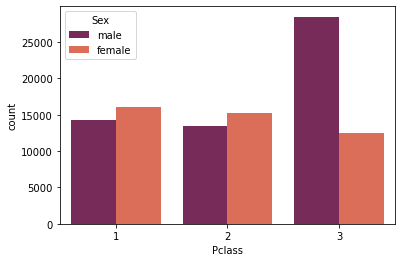

In [137]:
sns.countplot( x='Pclass', hue = 'Sex',  data=df, palette="rocket")

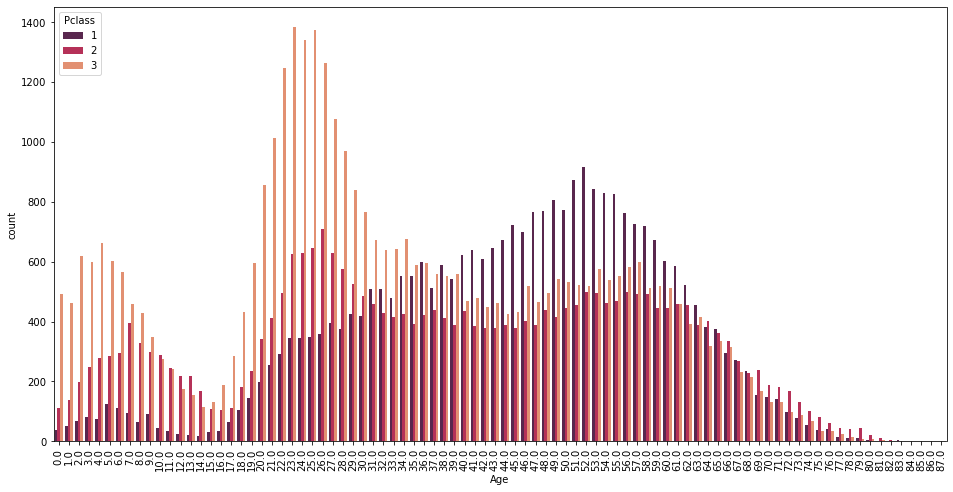

In [138]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Age', hue='Pclass',  data=df, palette="rocket")
ax.tick_params(axis='x', labelrotation=90)

<AxesSubplot:xlabel='Parch', ylabel='count'>

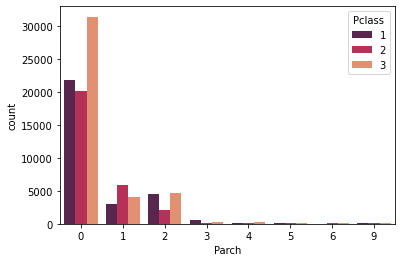

In [139]:
sns.countplot(x='Parch', hue='Pclass', data=df, palette="rocket")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

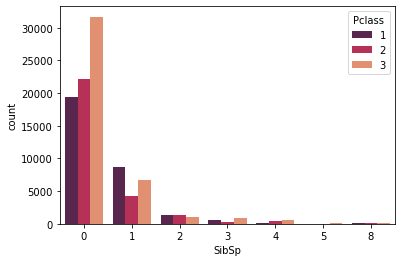

In [140]:
sns.countplot(x='SibSp', hue='Pclass',  data=df, palette="rocket")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

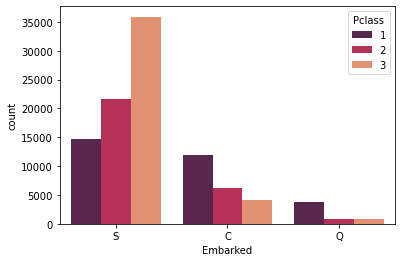

In [141]:
sns.countplot(x='Embarked', hue='Pclass',  data=df, palette="rocket")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

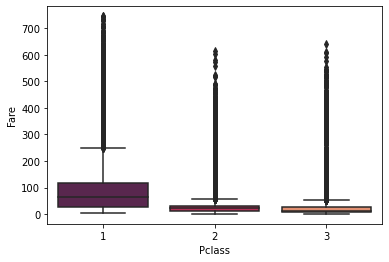

In [142]:
sns.boxplot(x='Pclass', y='Fare',  data=df, palette="rocket")

В целом в каждом классе, чуть больше женщин чем мужчин. Но видим большой дисбаланс в третьем классе. Очень много мужчин. Видимо в те времена бедные мужчины получали больше денег чем женщины.      
В первом классе больше людей в возрасте от 40 до 63. В остальных случаях людей с первого класса больше.       
Так же, большинство пассажиров с первого класса взяли с собой в детей.      
Так же почти все пассажиры третьего класса сели в парту S. В порту С и Q село меньше людей.      
Так же судя по последнему графику. У нас есть очень много дорогих билетов во втором и третьем классе. По в целом с такой стоимостью билета, пассажиры могли быть и в первом классе. Видимо это выброси, либо были ещё какие-то условия, что бы можно было попасть в первый класс.       

### Изучить распределение признаков по полу

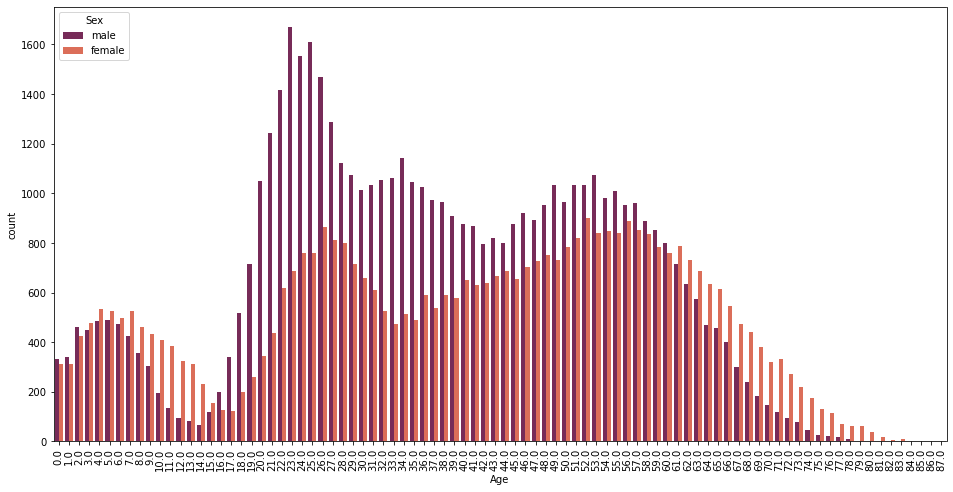

In [143]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Age', hue='Sex',  data=df, palette="rocket")
ax.tick_params(axis='x', labelrotation=90)

<AxesSubplot:xlabel='Parch', ylabel='count'>

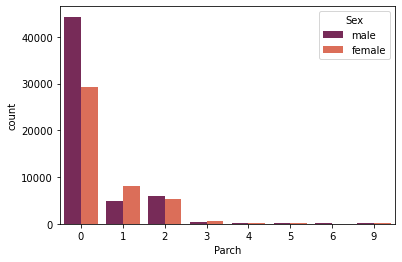

In [144]:
sns.countplot(x='Parch', hue='Sex', data=df, palette="rocket")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

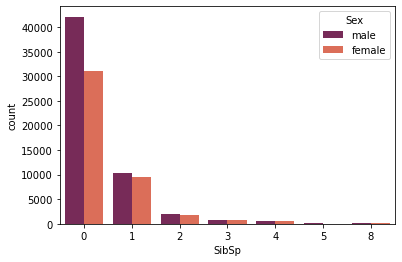

In [145]:
sns.countplot(x='SibSp', hue='Sex', data=df, palette="rocket")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

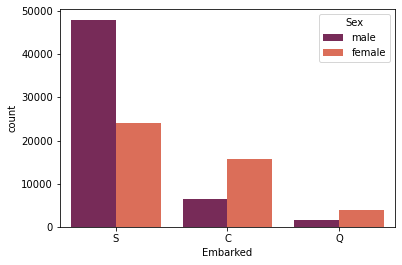

In [146]:
sns.countplot(x='Embarked', hue='Sex',  data=df, palette="rocket")

По возрасту, распределение почти одинаковое. Учитывая, что на борту больше мужчин. Однако детей-девочек от 4 до 14 лет больше чем мужчин. И более престарелого возраста начиная от 61. Женщин больше. Во всех остальных случаях больше мужчин. Особенно много мужчин от 17 до 30 лет. Видимо это все те же пассажиры третьего класса.     
Женщин со значением Parch =  1 и 3 больше, чем мужчин.    
Признаке SibSp мужчин во всех группах больше чем женщин.    
Теперь все ясно. В портах C и Q село больше женщин.    

### Изучим влияние наших признаков на выживаемость.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

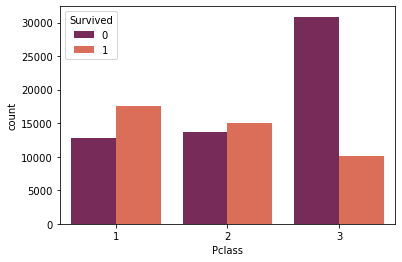

In [147]:
sns.countplot( x='Pclass', hue = 'Survived',  data=df, palette="rocket")

<AxesSubplot:xlabel='Sex', ylabel='count'>

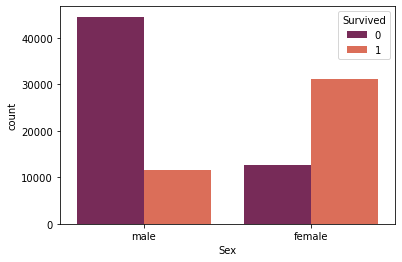

In [148]:
sns.countplot( x='Sex', hue = 'Survived',  data=df, palette="rocket")

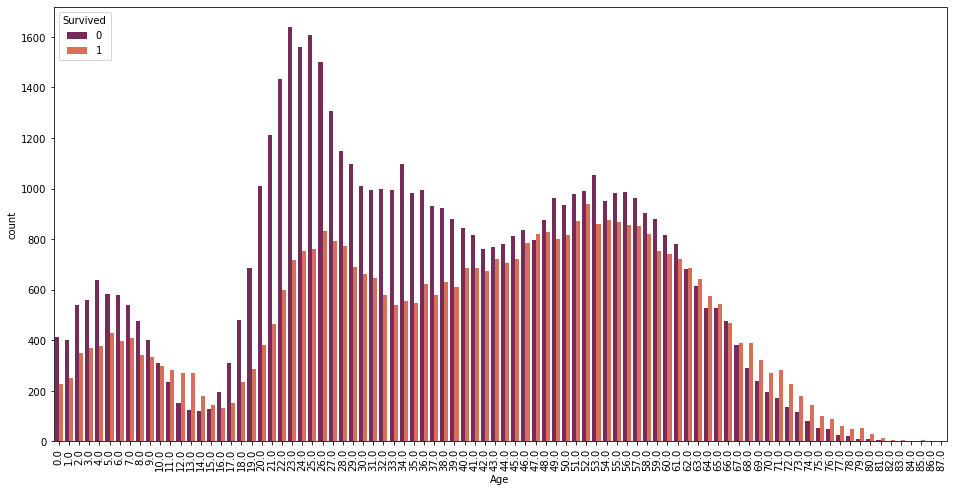

In [149]:
plt.figure(figsize=(16,8))
ax = sns.countplot( x='Age', hue = 'Survived',  data=df, palette="rocket")
ax.tick_params(axis='x', labelrotation=90)

<AxesSubplot:xlabel='Parch', ylabel='count'>

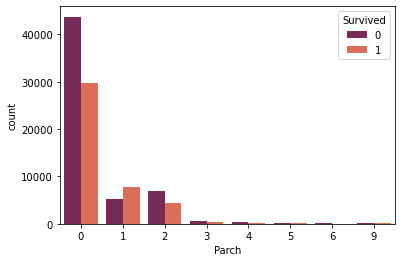

In [150]:
sns.countplot( x='Parch', hue = 'Survived',  data=df, palette="rocket")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

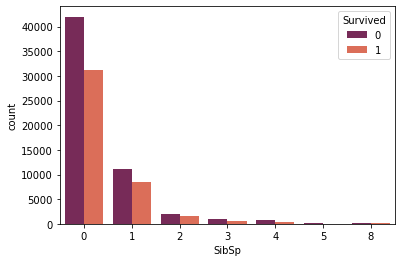

In [151]:
sns.countplot( x='SibSp', hue = 'Survived',  data=df, palette="rocket")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

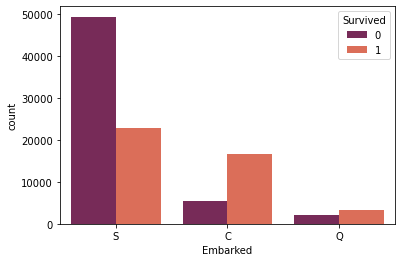

In [152]:
sns.countplot(x='Embarked', hue='Survived',  data=df, palette="rocket")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

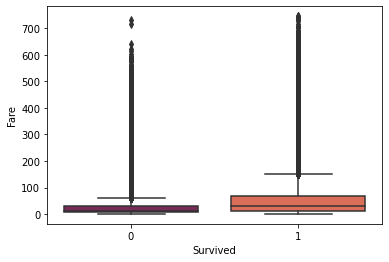

In [153]:
sns.boxplot(x='Survived', y='Fare',  data=df, palette="rocket")

Как мы видим выживаемость больше среди пассажиров первого класса. Видимо их эвакуировали в первую очередь. В связи с этим и большинство пассажиров в возрасте от 40 до 63 были спасены, которые являлись пассажирами первого класса.    
Так же выживаемость больше у детей в возрасте от 10 до 15 лет. Отметим, что в выборке в этом возрасте больше девочек, чем мальчиков.
Так же в первую очередь спасали женщин.    
Весьма интересно что, если у тебя был один родственник был на бору, вероятность спастись была чутка выше.    
Наличие на борту родителей или детей не особо влияло на выживаемость.    
Люди, которые сели в порту C и Q выживали чаше, чем те, которые сели в S. Опять же это связано с тем, что в этих портах село больше пассажиров первого класса.    
Так же видно, что люди, которые выжили в среднем платили чуть больше за билет. Однако это связано с тем, что выжило больше людей первого класса, которые платили больше за билет.    

### Статичстический тест

In [154]:
col = [ 'Sex','Embarked','surname']
col_2 = ['Pclass','Age', 'SibSp', 'Parch']


In [155]:
df_2 = df.copy().dropna()

In [156]:
label_encoder = LabelEncoder()
for column in col:
    df_2[column] = label_encoder.fit_transform(df_2[column])

<AxesSubplot:>

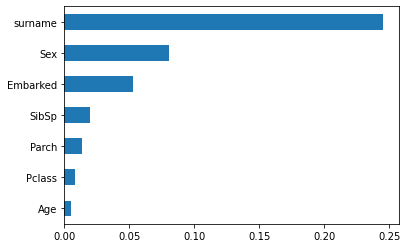

In [157]:
imp_cat = pd.Series(mutual_info_classif(df_2[col+col_2],
                                        df_2['Survived'], discrete_features=True),
                                        index=col+col_2)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

Весьма интересно, что Фамилия играет большую роль. Изучим пару экземпляров

Судя по графикам в первую очередь спасали определьнные семьи, потом женщин.     
После идет порт посадки, который тоже неявно связан с полом. Т.к. в портах С и Q село больше жещни.  

In [158]:
avv = df.surname.value_counts()
avv2 = df.groupby('surname').sum()['Survived']
df_av_1 = pd.DataFrame(avv)
df_av_1.columns = ["Total"]
df_av_2 = pd.DataFrame(avv2)
df_surv_total = df_av_1.merge(df_av_2, how='inner', right_index=True,left_index=True)
df_surv_total

,Total,Survived
Smith,1162,506
Johnson,950,403
Williams,733,301
Jones,681,299
Brown,665,288
...,...,...
Kempson,1,1
Fraughton,1,0
Mathwich,1,1
Wenz,1,0


In [159]:
avv2 = df.groupby('surname').sum()['Survived']

In [160]:
df_av_1 = pd.DataFrame(avv)

In [161]:
df_av_1.columns = ["Total"]

In [162]:
df_av_2 = pd.DataFrame(avv2)

In [163]:
df_surv_total = df_av_1.merge(df_av_2, how='inner', right_index=True,left_index=True)

In [164]:
df_surv_total

,Total,Survived
Smith,1162,506
Johnson,950,403
Williams,733,301
Jones,681,299
Brown,665,288
...,...,...
Kempson,1,1
Fraughton,1,0
Mathwich,1,1
Wenz,1,0


In [165]:
df_surv_total['percent'] = df_surv_total['Survived'] / df_surv_total['Total'] 

In [166]:
df_surv_total.sort_values(by = 'percent', ascending = False).head(20)

,Total,Survived,percent
Homza,1,1,1.0
Jankowiak,2,2,1.0
Greig,4,4,1.0
Beaudette,1,1,1.0
Dipaolo,2,2,1.0
Bischoff,2,2,1.0
Trojanowski,1,1,1.0
Beedle,1,1,1.0
Borrego,2,2,1.0
Bork,4,4,1.0


In [167]:
df[df.surname == 'Pulley']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name,surname
2949,2949,1,2,"Pulley, Lina",female,42.0,0,0,438229,14.28,NaN,S,Lina,Pulley
57265,57265,1,1,"Pulley, Lisa",female,25.0,0,0,3851564,446.42,C9281,Q,Lisa,Pulley
60780,60780,1,1,"Pulley, Kathleen",female,48.0,0,0,PC 12127,29.48,C9737,S,Kathleen,Pulley
74631,74631,1,2,"Pulley, Donna",female,2.0,1,2,446080,11.84,NaN,S,Donna,Pulley


Предположу, что surname не являться достоверным признаком. Т.К. выборки по каждой фамилии не достаточно велики, что бы проводить статистический тест.

## Проверим корреляцию между SibSp и Parch

In [168]:
df[['SibSp','Parch']].corr()

,SibSp,Parch
SibSp,1.000000,0.213126
Parch,0.213126,1.000000


Корреляция между признаками низкая. Хотя признаки имеют похожий смысл.

### Вывод

Судя по графикам, самым определяющим фактором является пол пассажира. В первую очередь спасали женщин. Так же значимым фактором является Sibs.     
Остальные факторы косвенно связаны с полого пассажира.
Так же в дата сете замечено очень много дорогих билетов третьего и второго класса. Возможно это все выбросы, либо были ещё какие-то критерии что бы попасть в первый класс. Этот вопрос требует дальнейшего изучения.
Из анализы убран признак Cabin, т.к. в признаке более 60 % пропуски. 